In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
'Bhuvan'

'Bhuvan'

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [7]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [8]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [11]:
new = df.copy()
new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [13]:
label = LabelEncoder()
new['fuel_label'] = label.fit_transform(new['fuel'])
new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_label
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,1


In [14]:
new['fuel_label'].value_counts()

1    2153
4    2123
0      40
3      23
2       1
Name: fuel_label, dtype: int64

In [16]:
transmission_new = label.fit_transform(new['transmission'])
transmission_new

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
new.insert(7,'transmission_label',transmission_new)

In [18]:
new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,transmission_label,owner,fuel_label
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1,First Owner,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1,First Owner,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1,First Owner,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1,First Owner,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,1,Second Owner,1


In [19]:
new['transmission_label'].value_counts()

1    3892
0     448
Name: transmission_label, dtype: int64

In [20]:
new.insert(9,'owner_label',label.fit_transform(new['owner']))

In [21]:
new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,transmission_label,owner,owner_label,fuel_label
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1,First Owner,0,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1,First Owner,0,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1,First Owner,0,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1,First Owner,0,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,1,Second Owner,2,1


In [22]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                4340 non-null   object
 1   year                4340 non-null   int64 
 2   selling_price       4340 non-null   int64 
 3   km_driven           4340 non-null   int64 
 4   fuel                4340 non-null   object
 5   seller_type         4340 non-null   object
 6   transmission        4340 non-null   object
 7   transmission_label  4340 non-null   int32 
 8   owner               4340 non-null   object
 9   owner_label         4340 non-null   int32 
 10  fuel_label          4340 non-null   int32 
dtypes: int32(3), int64(3), object(5)
memory usage: 322.2+ KB


In [23]:
data = new.copy()

In [24]:
new.reindex(columns=['selling_price','fuel_label'])

,selling_price,fuel_label
0,60000,4
1,135000,4
2,600000,1
3,250000,4
4,450000,1
...,...,...
4335,409999,1
4336,409999,1
4337,110000,4
4338,865000,1


In [25]:
new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,transmission_label,owner,owner_label,fuel_label
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1,First Owner,0,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1,First Owner,0,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1,First Owner,0,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1,First Owner,0,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,1,Second Owner,2,1


In [26]:
req_df = new.loc[:,['year','km_driven','fuel_label','transmission_label','owner_label']]

In [27]:
req_df.head()

,year,km_driven,fuel_label,transmission_label,owner_label
0,2007,70000,4,1,0
1,2007,50000,4,1,0
2,2012,100000,1,1,0
3,2017,46000,4,1,0
4,2014,141000,1,1,2


In [28]:
new['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [29]:
new.insert(6,'seller_type_label',label.fit_transform(new['seller_type']))

In [30]:
new.head()

,name,year,selling_price,km_driven,fuel,seller_type,seller_type_label,transmission,transmission_label,owner,owner_label,fuel_label
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,Manual,1,First Owner,0,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,Manual,1,First Owner,0,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,Manual,1,First Owner,0,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,Manual,1,First Owner,0,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,Manual,1,Second Owner,2,1


In [32]:
req_df['seller_type_label'] = new['seller_type_label']
req_df.head()

,year,km_driven,fuel_label,transmission_label,owner_label,seller_type_label
0,2007,70000,4,1,0,1
1,2007,50000,4,1,0,1
2,2012,100000,1,1,0,1
3,2017,46000,4,1,0,1
4,2014,141000,1,1,2,1


In [33]:
new['seller_type_label'].value_counts()

1    3244
0     994
2     102
Name: seller_type_label, dtype: int64

In [34]:
new['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [35]:
one_hot_endoder = pd.get_dummies(new['seller_type'])

In [37]:
one_hot_endoder.head()

,Dealer,Individual,Trustmark Dealer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [38]:
new.head()

,name,year,selling_price,km_driven,fuel,seller_type,seller_type_label,transmission,transmission_label,owner,owner_label,fuel_label
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,Manual,1,First Owner,0,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,Manual,1,First Owner,0,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,Manual,1,First Owner,0,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,Manual,1,First Owner,0,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,Manual,1,Second Owner,2,1


In [40]:
new['no_of_years'] = [2023 - x for x in new['year']]
new.head()

,name,year,selling_price,km_driven,fuel,seller_type,seller_type_label,transmission,transmission_label,owner,owner_label,fuel_label,no_of_years
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,Manual,1,First Owner,0,4,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,Manual,1,First Owner,0,4,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,Manual,1,First Owner,0,1,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,Manual,1,First Owner,0,4,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,Manual,1,Second Owner,2,1,9


In [41]:
req_df['no_of_years'] = new['no_of_years']
req_df.head()

,year,km_driven,fuel_label,transmission_label,owner_label,seller_type_label,no_of_years
0,2007,70000,4,1,0,1,16
1,2007,50000,4,1,0,1,16
2,2012,100000,1,1,0,1,11
3,2017,46000,4,1,0,1,6
4,2014,141000,1,1,2,1,9


In [42]:
req_df['year'] + req_df['no_of_years']

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
4335    2023
4336    2023
4337    2023
4338    2023
4339    2023
Length: 4340, dtype: int64

In [43]:
2023 - req_df['year']

0       16
1       16
2       11
3        6
4        9
        ..
4335     9
4336     9
4337    14
4338     7
4339     7
Name: year, Length: 4340, dtype: int64

In [44]:
req_df.drop(['year'],axis = 1,inplace = True)
req_df.head()

,km_driven,fuel_label,transmission_label,owner_label,seller_type_label,no_of_years
0,70000,4,1,0,1,16
1,50000,4,1,0,1,16
2,100000,1,1,0,1,11
3,46000,4,1,0,1,6
4,141000,1,1,2,1,9


In [45]:
req_df['current_price'] = new['selling_price']
req_df.head()

,km_driven,fuel_label,transmission_label,owner_label,seller_type_label,no_of_years,current_price
0,70000,4,1,0,1,16,60000
1,50000,4,1,0,1,16,135000
2,100000,1,1,0,1,11,600000
3,46000,4,1,0,1,6,250000
4,141000,1,1,2,1,9,450000


In [47]:
new.rename(columns={'selling_price':'current_price'},inplace=True)

In [48]:
new.head()

,name,year,current_price,km_driven,fuel,seller_type,seller_type_label,transmission,transmission_label,owner,owner_label,fuel_label,no_of_years
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,Manual,1,First Owner,0,4,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,Manual,1,First Owner,0,4,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,Manual,1,First Owner,0,1,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,Manual,1,First Owner,0,4,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,Manual,1,Second Owner,2,1,9


In [49]:
req_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   km_driven           4340 non-null   int64
 1   fuel_label          4340 non-null   int32
 2   transmission_label  4340 non-null   int32
 3   owner_label         4340 non-null   int32
 4   seller_type_label   4340 non-null   int32
 5   no_of_years         4340 non-null   int64
 6   current_price       4340 non-null   int64
dtypes: int32(4), int64(3)
memory usage: 169.7 KB


In [50]:
req_df.corr()

,km_driven,fuel_label,transmission_label,owner_label,seller_type_label,no_of_years,current_price
km_driven,1.000000,-0.286095,0.120226,0.297115,0.113689,0.419688,-0.192289
fuel_label,-0.286095,1.000000,0.039249,-0.010910,0.038797,0.120002,-0.269653
transmission_label,0.120226,0.039249,1.000000,0.078893,0.174925,0.143800,-0.530205
owner_label,0.297115,-0.010910,0.078893,1.000000,0.165681,0.414705,-0.207840
seller_type_label,0.113689,0.038797,0.174925,0.165681,1.000000,0.098352,-0.151554
no_of_years,0.419688,0.120002,0.143800,0.414705,0.098352,1.000000,-0.413922
current_price,-0.192289,-0.269653,-0.530205,-0.207840,-0.151554,-0.413922,1.000000


<AxesSubplot: >

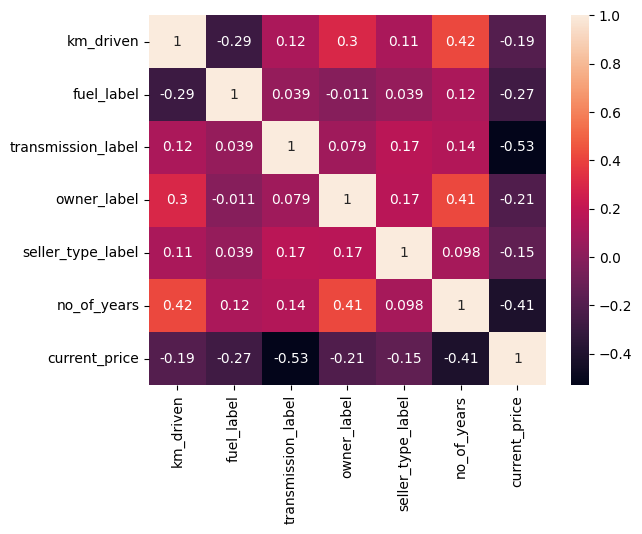

In [51]:
import seaborn as sns
sns.heatmap(req_df.corr(),annot = True)

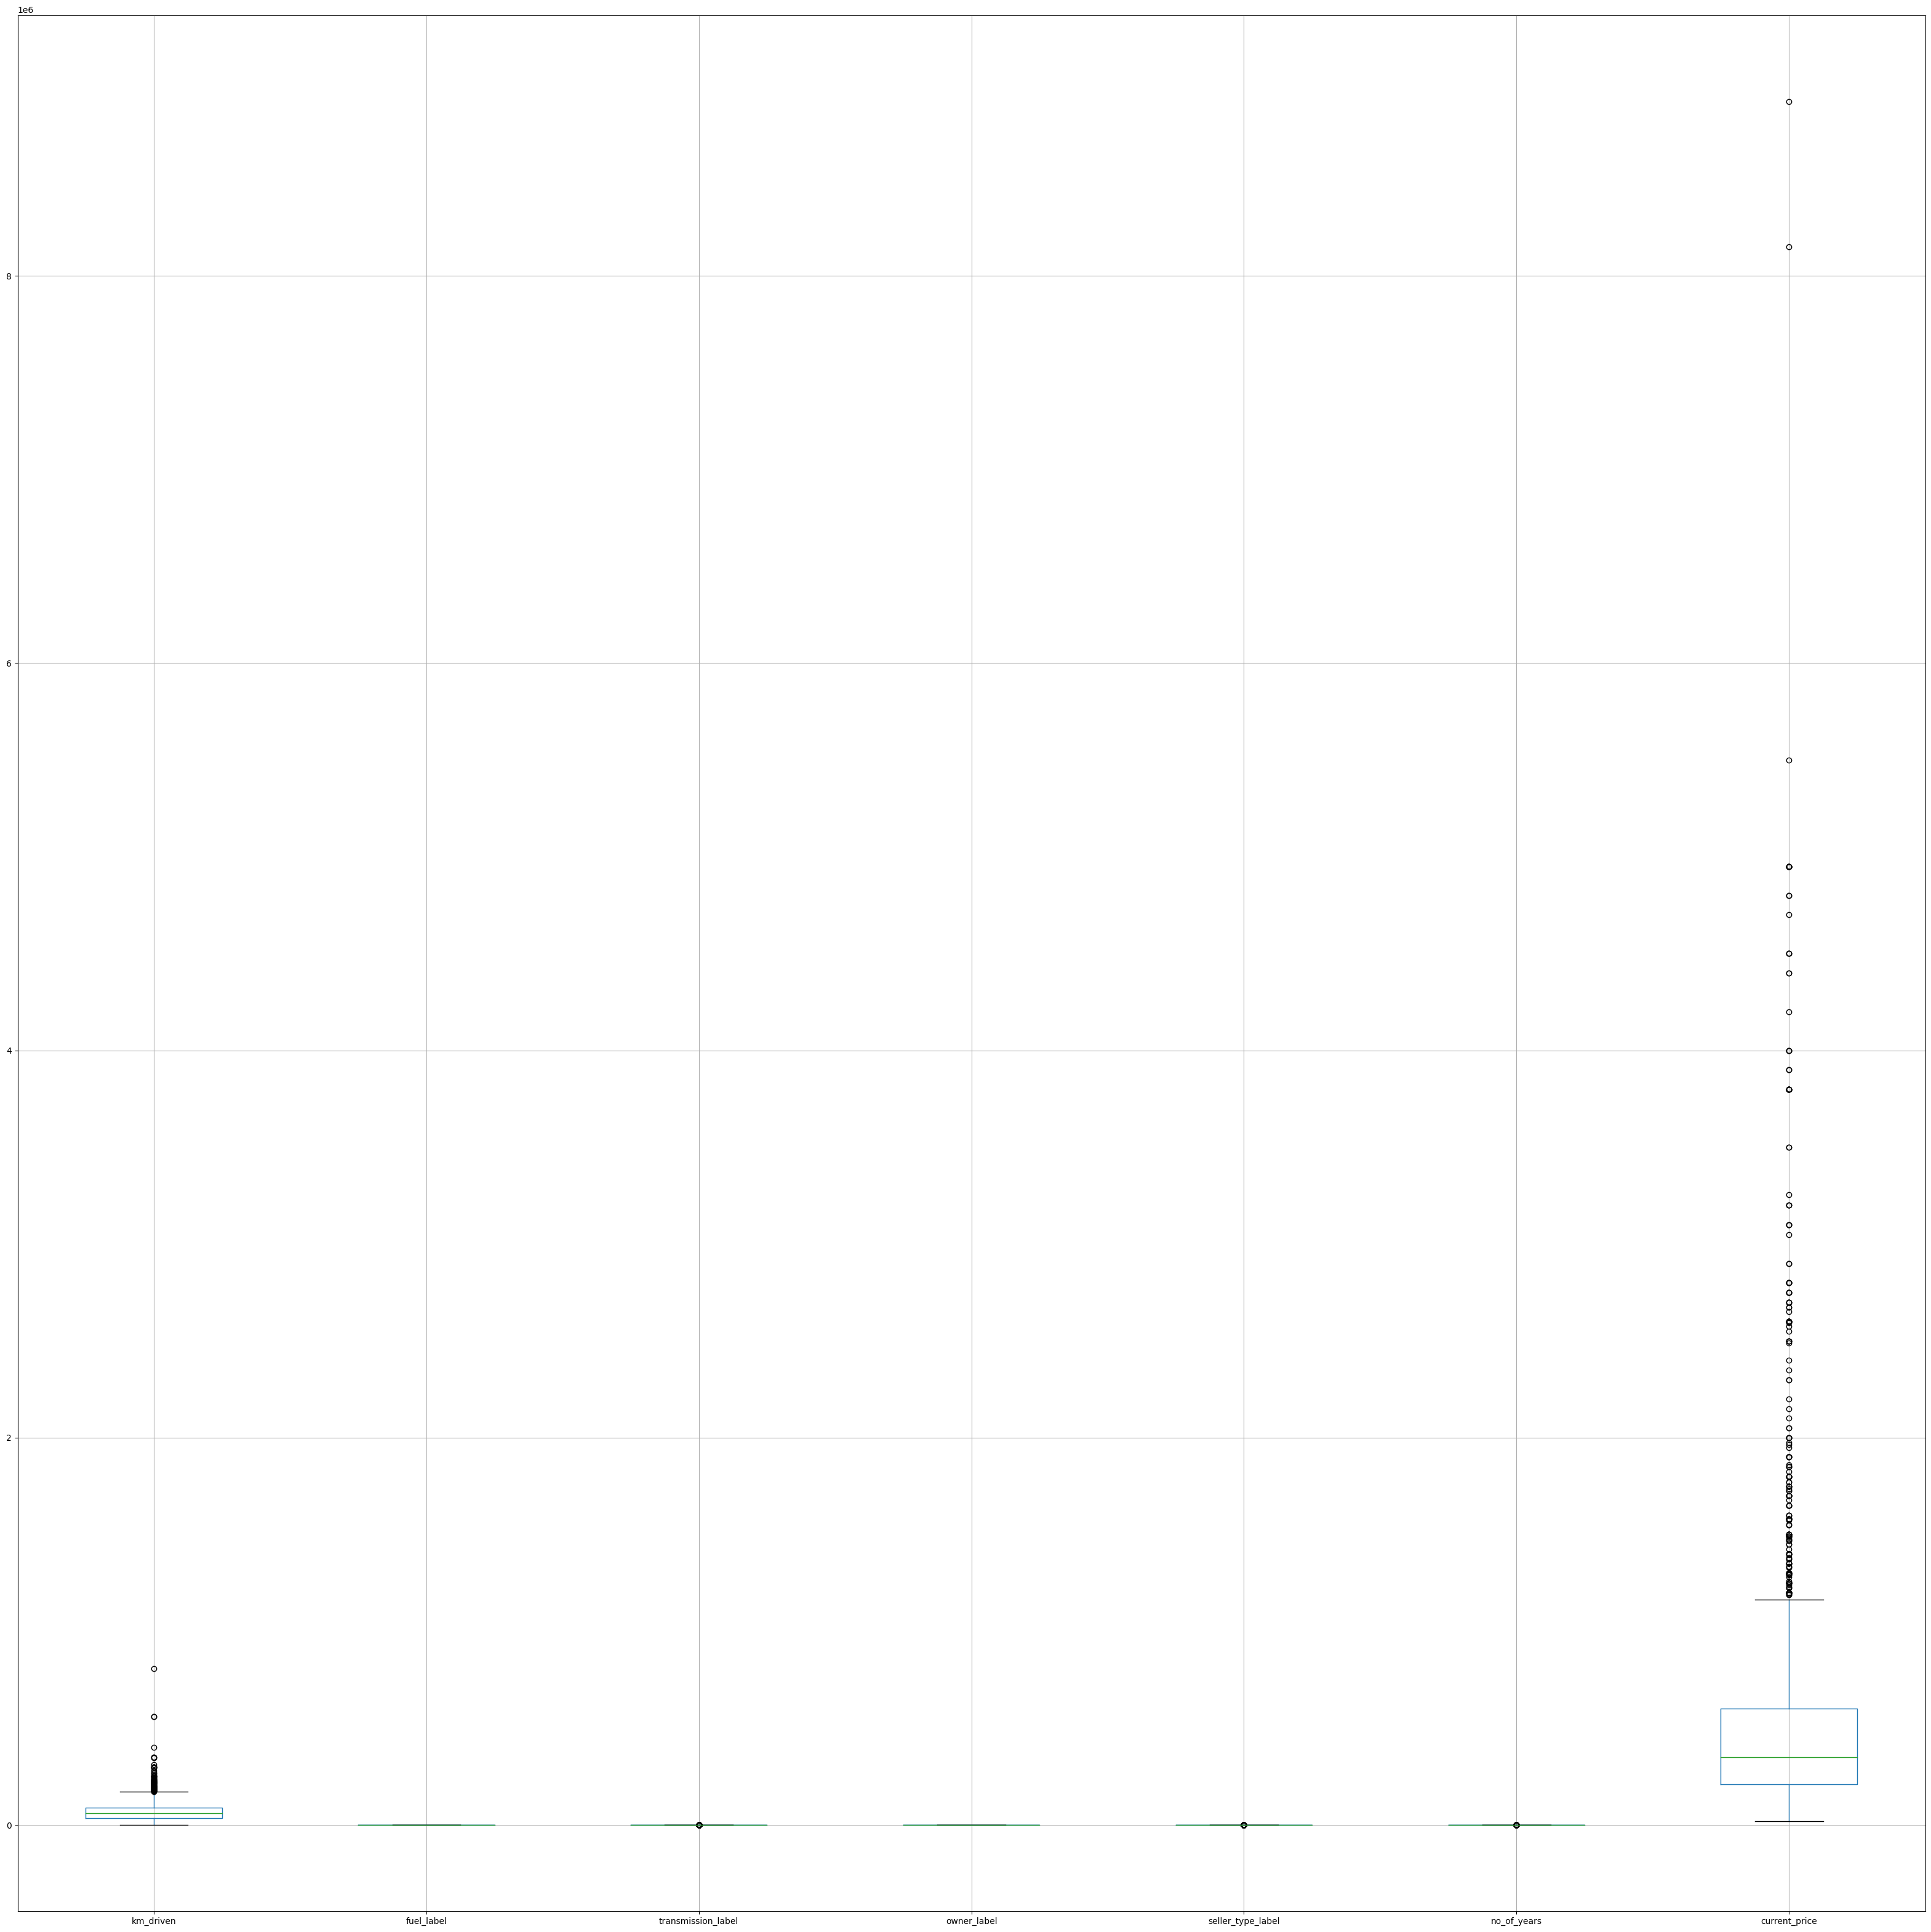

In [57]:
plt.figure(figsize=(40,40))
req_df.boxplot()
plt.show()

In [58]:
req_df.head()

,km_driven,fuel_label,transmission_label,owner_label,seller_type_label,no_of_years,current_price
0,70000,4,1,0,1,16,60000
1,50000,4,1,0,1,16,135000
2,100000,1,1,0,1,11,600000
3,46000,4,1,0,1,6,250000
4,141000,1,1,2,1,9,450000


In [59]:
x = req_df.drop('current_price',axis = 1).values
y = req_df['current_price'].values

In [60]:
x

array([[ 70000,      4,      1,      0,      1,     16],
       [ 50000,      4,      1,      0,      1,     16],
       [100000,      1,      1,      0,      1,     11],
       ...,
       [ 83000,      4,      1,      2,      1,     14],
       [ 90000,      1,      1,      0,      1,      7],
       [ 40000,      4,      1,      0,      1,      7]], dtype=int64)

In [61]:
y

array([ 60000, 135000, 600000, ..., 110000, 865000, 225000], dtype=int64)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [64]:
x_train.shape

(3472, 6)

In [65]:
y_train.shape

(3472,)

In [66]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [67]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [69]:
y_pred = model.predict(x_test)

In [70]:
model.score(x_train,y_train)

0.9631479712538425

In [71]:
from sklearn.metrics import accuracy_score,r2_score

In [73]:
y_pred

array([ 750000.        ,  385000.        ,  990000.        ,
        643750.        , 1825000.        ,  249400.        ,
        625000.        ,  433333.33333333, 1900000.        ,
        330000.        ,   70000.        ,  790000.        ,
        550000.        ,  770000.        ,  443230.69230769,
        159000.        ,  550000.        , 1490000.        ,
        612100.        ,  180000.        ,  345000.        ,
        120000.        ,  507500.        ,  280000.        ,
        385000.        ,  210000.        ,  475000.        ,
        500000.        ,   89999.        ,  900000.        ,
        670000.        ,  600000.        ,  204999.        ,
        496200.        ,  635000.        ,  300000.        ,
        400000.        ,  900000.        ,  111666.66666667,
         50000.        ,  277500.        ,  220000.        ,
        880000.        ,  127666.66666667,  349000.        ,
        321250.        ,  475000.        ,  210000.        ,
        145000.        ,

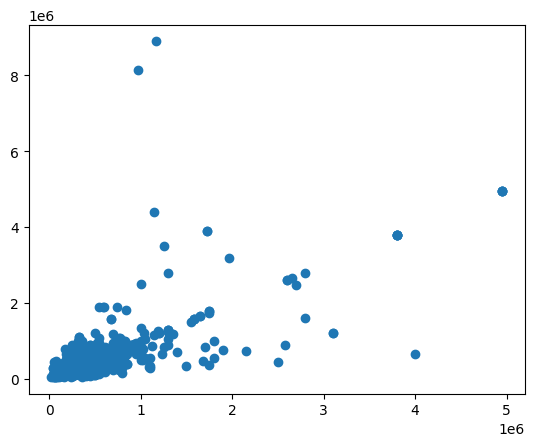

In [74]:
plt.scatter(y_test,y_pred)
plt.scatter(x_test,)

In [75]:
r2_score(y_test,y_pred)

0.259700288216159